# Reinforcement Learning in Gridworld Problem

In this demo, we will use **Q-learning**, a classic Reinforcement Learning (RL) algorithm,
to solve a simple **Gridworld** problem.

The agent starts from the bottom-left corner and must find the optimal path
to reach the **goal state (+1 reward)** while avoiding the **trap (-1 reward)**.

## Step 1: Initialize the Gridworld Environment

We can see the image of grid

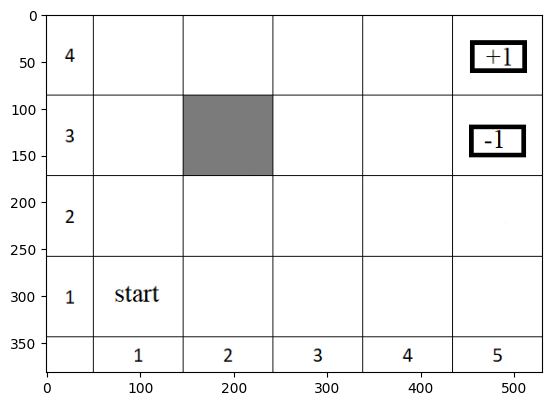

In [82]:
import matplotlib.pyplot as plt
img = plt.imread("./image/grid.png")
plt.imshow(img)

The environment is represented as a grid:

- `0` : normal cell with a small step penalty (e.g., -0.04)
- `None` : wall (cannot pass through)
- `+1` : terminal goal state (positive reward)
- `-1` : terminal trap state (negative reward)

In [83]:
maps = [
    [0,    0,    0,    0,   +1],
    [0,  None,   0,    0,   -1],
    [0,    0,    0,    0,    0],
    [0,    0,    0,    0,    0]
]

We define a Python class `GridWorld` with three key functions:
- `reset()` : resets the agent to the starting position
- `step(action)` : takes an action (up, down, left, right) and returns `(next_state, reward, done)`
- `render()` : prints the grid with the agent’s path for visualization

In [84]:
import numpy as np

class GridWorld:
    def __init__(self, grid):
        """
        Example cell values:
            0 -> normal cell
            None -> wall
            +1 -> goal
            -1 -> trap
        :param grid: 2D list (rows × cols), representing the environment.
        """
        self.grid = grid
        self.rowsLength = len(grid)
        self.colsLength = len(grid[0])

        self.start = (3, 0)
        self.state = self.start

    def reset(self):
        """
        Reset the agent to the start position.
        :return: the initial state.
        """
        self.state = self.start
        return self.state

    def step(self, action):
        """
        Take an action and move the agent.
        :param action: 0 = up, 1 = down, 2 = left, 3 = right
        :return:
            next_state : (row, col)
            reward : float
            done : bool (whether the episode ends)
        """
        # Initial row and column
        row, col = self.state

        # Action mapping
        if   action == 0: row -= 1  # up
        elif action == 1: row += 1  # down
        elif action == 2: col -= 1  # left
        elif action == 3: col += 1  # right

        # Boundary and Wall check
        if row < 0 or row >= self.rowsLength or col < 0 or col >= self.colsLength or self.grid[row][col] is None:
            row, col = self.state   # Stay
        # Update state
        self.state = row, col

        # Reward
        if self.grid[row][col] == 0:
            reward = -0.05  # Common blocks
        elif self.grid[row][col] == 1:
            reward = 1      # Goal
        elif self.grid[row][col] == -1:
            reward = -1     # Trap
        else:
            reward = 0      # Default

        # Endpoint
        end = self.grid[row][col] in [1, -1]

        return self.state, reward, end

    def render(self, path = []):
        """
        Print the grid with the path taken.
        :param path: The solution path
        """
        # Draw map
        solution = [
            [
                '.' if ch == 0 else
                '#' if ch is None else
                str(ch)
                for ch in row
            ] for row in self.grid
        ]
        # Mark visited
        for r, c in path:
            solution[r][c] = '*'
        print("\n".join("   ".join(row) for row in solution))

Now we can initialize the grid

In [85]:
grid = GridWorld(maps)

## Step 2: Implement Q-learning

Q-learning update rule:

$$
Q(s, a) \leftarrow Q(s, a) + \alpha \Big[ r + \gamma \max_{a'} Q(s', a') - Q(s, a) \Big]
$$

Where:
- ($ \alpha $) : learning rate
- ($ \gamma $) : discount factor
- ($ \epsilon $) : exploration rate (ε-greedy policy)

In [86]:
import random

# Initialize Q-table
actions = [0, 1, 2, 3]
Q = {}
alpha, gamma, epsilon = 0.1, 0.9, 0.1
episodes = 500

# Training Loop
for ep in range(episodes):
    state = grid.reset()
    end = False
    while not end:
        # Policy
        if random.random() < epsilon:
            action = random.choice(actions)
        else:
            action = max(actions, key=lambda a: Q.get((state, a), 0))

        # Take action
        next_state, reward, end = grid.step(action)

        # Q-learning update
        old_q = Q.get((state, action), 0)
        next_max = max([Q.get((next_state, a), 0) for a in actions])
        Q[(state, action)] = old_q + alpha * (reward + gamma * next_max - old_q)

        state = next_state

## Step 3: Extract the Optimal Path

After training, we use the learned Q-table to follow the **greedy policy**
(i.e., always take the action with the highest Q-value).

In [87]:
# Extract optimal path
state = grid.reset()
path = [state]
done = False
while not done:
    action = max(actions, key=lambda a: Q.get((state, a), 0))
    state, reward, done = grid.step(action)
    path.append(state)

# Render the grid with optimal path
print("Solution:")
grid.render(path)

Solution:
.   .   .   *   *
.   #   .   *   -1
.   *   *   *   .
*   *   .   .   .


## Step 4: Conclusion

- The agent successfully learned to navigate the Gridworld using **Q-learning**.
- It discovered the shortest safe path to the **goal (+1)** while avoiding the **trap (-1)**.
- Key RL concepts:
  - Exploration vs. Exploitation (ε-greedy)
  - Temporal Difference learning (Q-learning update rule)
  - Value-based policy extraction from Q-table

This is a minimal example. In larger environments, we can extend this idea using **Deep Q-Learning (DQN)** with neural networks.